In [1]:
%matplotlib inline

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL, seasonal_decompose

# Time Series

Dataset Link bike-sharing-demand: https://www.kaggle.com/datasets/abdullapathan/bikesharingdemand

In [3]:
bikes_data = pd.read_csv("data/train.csv")

In [4]:
bikes_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
bikes_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
bikes_data.shape

(10886, 12)

In [7]:
bikes_data.datetime.loc[0]

'2011-01-01 00:00:00'

In [8]:
type(bikes_data.datetime.loc[0])

str

In [9]:
pd.to_datetime(bikes_data.datetime)

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [10]:
bikes_data.datetime = pd.to_datetime(bikes_data.datetime)

In [11]:
bikes_data.datetime.dt.year.value_counts()

datetime
2012    5464
2011    5422
Name: count, dtype: int64

In [12]:
bikes_data.datetime.dt.month.value_counts().sort_index()

datetime
1     884
2     901
3     901
4     909
5     912
6     912
7     912
8     912
9     909
10    911
11    911
12    912
Name: count, dtype: int64

In [13]:
bikes_data.datetime > "2012-03-21"

0        False
1        False
2        False
3        False
4        False
         ...  
10881     True
10882     True
10883     True
10884     True
10885     True
Name: datetime, Length: 10886, dtype: bool

In [14]:
bikes_data[
    (bikes_data.datetime >= "2012-03-21") &
    (bikes_data.datetime < "2012-06-21")
]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6785,2012-04-01 00:00:00,2,0,0,2,14.76,16.665,76,16.9979,8,59,67
6786,2012-04-01 01:00:00,2,0,0,2,14.76,17.425,76,11.0014,13,49,62
6787,2012-04-01 02:00:00,2,0,0,2,14.76,17.425,76,11.0014,20,61,81
6788,2012-04-01 03:00:00,2,0,0,2,13.94,16.665,81,8.9981,4,21,25
6789,2012-04-01 04:00:00,2,0,0,2,13.94,17.425,81,6.0032,3,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...
8146,2012-06-19 19:00:00,2,0,1,1,32.80,38.635,59,15.0013,82,432,514
8147,2012-06-19 20:00:00,2,0,1,1,32.80,37.880,55,16.9979,59,399,458
8148,2012-06-19 21:00:00,2,0,1,1,31.16,35.605,62,11.0014,37,239,276
8149,2012-06-19 22:00:00,2,0,1,1,29.52,34.850,79,6.0032,51,240,291


In [15]:
bikes_data[
    (bikes_data.datetime >= "2012-03-21") &
    (bikes_data.datetime < "2012-06-21") &
    (bikes_data.workingday == 1)
]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6809,2012-04-02 00:00:00,2,0,1,3,18.04,21.970,82,7.0015,6,11,17
6810,2012-04-02 01:00:00,2,0,1,3,17.22,21.210,88,6.0032,0,5,5
6811,2012-04-02 02:00:00,2,0,1,3,18.04,21.970,94,8.9981,2,3,5
6812,2012-04-02 04:00:00,2,0,1,1,16.40,20.455,76,32.9975,2,2,4
6813,2012-04-02 05:00:00,2,0,1,1,16.40,20.455,76,32.9975,2,22,24
...,...,...,...,...,...,...,...,...,...,...,...,...
8146,2012-06-19 19:00:00,2,0,1,1,32.80,38.635,59,15.0013,82,432,514
8147,2012-06-19 20:00:00,2,0,1,1,32.80,37.880,55,16.9979,59,399,458
8148,2012-06-19 21:00:00,2,0,1,1,31.16,35.605,62,11.0014,37,239,276
8149,2012-06-19 22:00:00,2,0,1,1,29.52,34.850,79,6.0032,51,240,291


In [69]:
spring_bikes_data = bikes_data[
    (bikes_data.datetime >= "2012-03-21") &
    (bikes_data.datetime < "2012-06-21") 
]

In [17]:
winter_bikes_data = bikes_data[
    (bikes_data.datetime >= "2011-12-22") &
    (bikes_data.datetime < "2012-03-21") 
]

In [18]:
spring_bikes_data.shape, winter_bikes_data.shape

((1366, 12), (1363, 12))

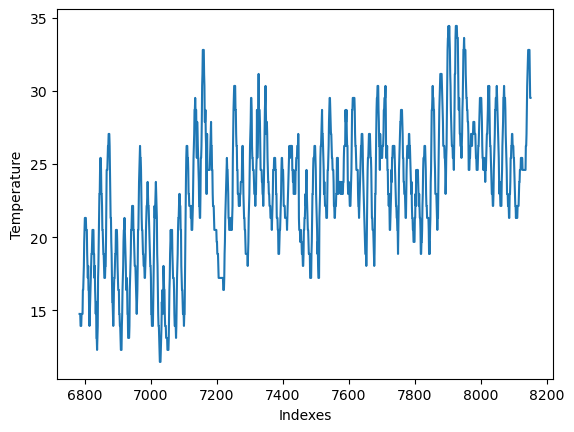

In [19]:
plt.plot(spring_bikes_data.temp)
plt.xlabel("Indexes")  
plt.ylabel("Temperature")     
plt.show()

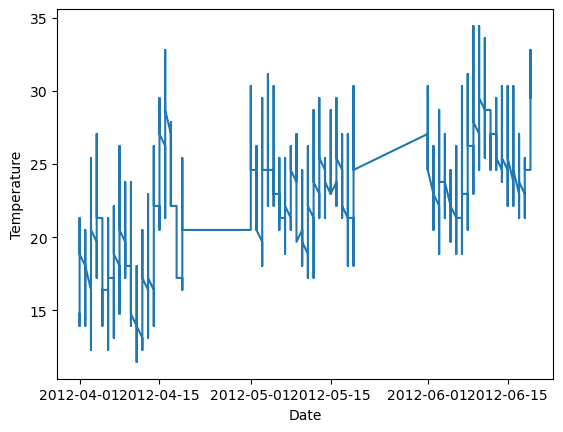

In [20]:
plt.plot(spring_bikes_data.datetime.dt.date, spring_bikes_data.temp)
plt.xlabel("Date")  
plt.ylabel("Temperature")     
plt.show()

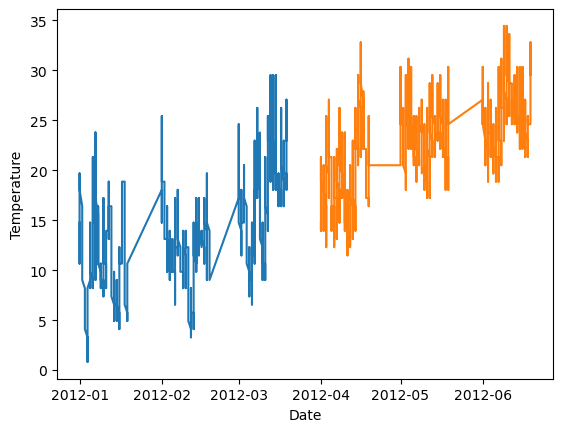

In [21]:
plt.plot(winter_bikes_data.datetime.dt.date, winter_bikes_data.temp)
plt.plot(spring_bikes_data.datetime.dt.date, spring_bikes_data.temp)
plt.xlabel("Date")  
plt.ylabel("Temperature")     
plt.show()

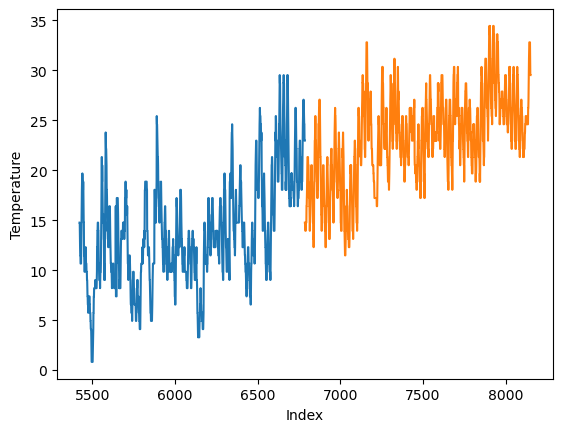

In [22]:
plt.plot(winter_bikes_data.temp)
plt.plot(spring_bikes_data.temp)
plt.xlabel("Index")  
plt.ylabel("Temperature")     
plt.show()

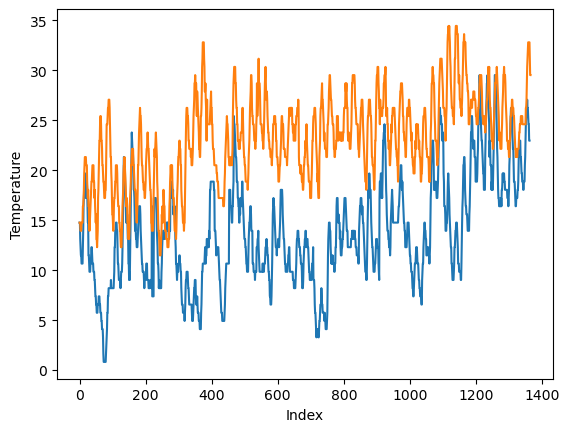

In [23]:
plt.plot(winter_bikes_data.temp.reset_index(drop = True), label = "winter")
plt.plot(spring_bikes_data.temp.reset_index(drop = True), label = "spring")
plt.xlabel("Index")  
plt.ylabel("Temperature")     
plt.show()

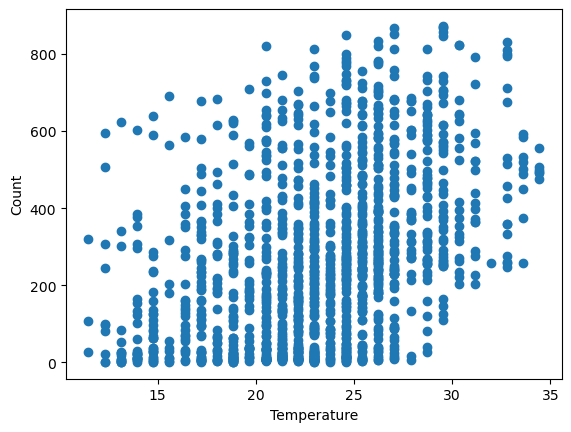

In [24]:
plt.scatter(spring_bikes_data.temp, spring_bikes_data["count"])
plt.xlabel("Temperature")  
plt.ylabel("Count")     
plt.show()

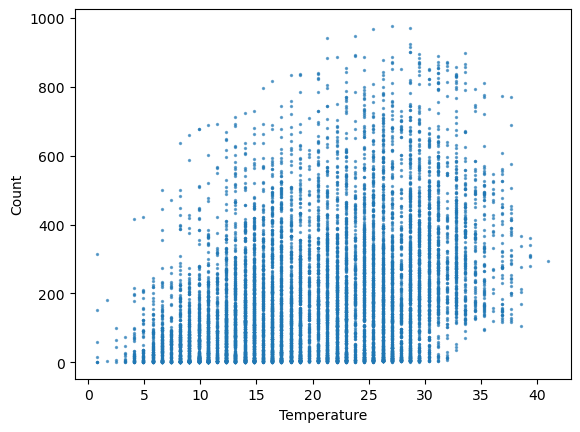

In [25]:
plt.scatter(bikes_data.temp, bikes_data["count"], s = 2, alpha = 0.6)
plt.xlabel("Temperature")  
plt.ylabel("Count")     
plt.show()

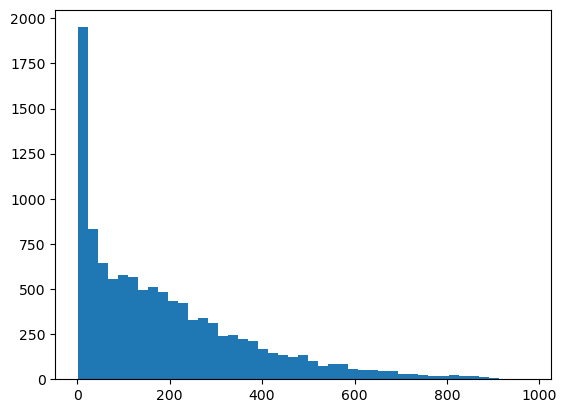

In [26]:
plt.hist(bikes_data["count"], bins = "fd")
plt.show()

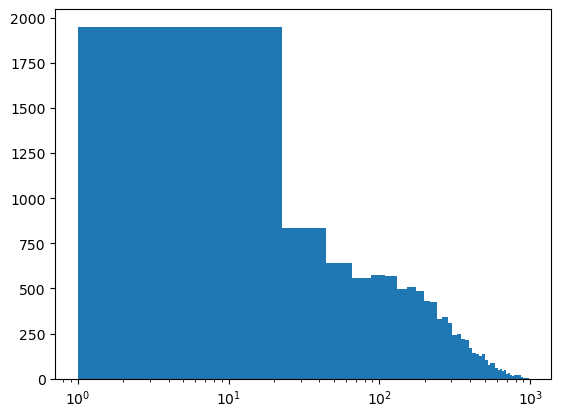

In [27]:
plt.hist(bikes_data["count"], bins = "fd")
plt.semilogx()
plt.show()

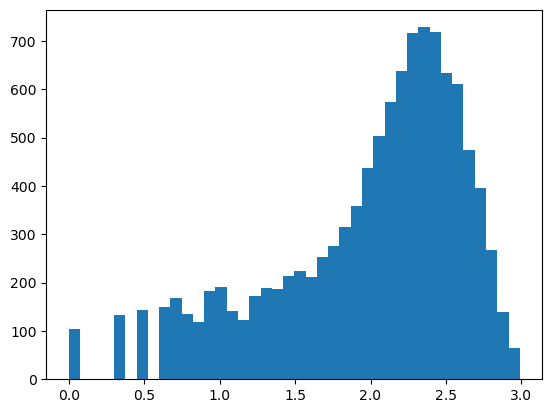

In [28]:
plt.hist(np.log10(bikes_data["count"]), bins = "fd")
plt.show()

It is not lognormal distribution, but close to it.

In [29]:
bikes_data[bikes_data["count"] < 10]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10841,2012-12-18 03:00:00,4,0,1,1,17.22,21.210,88,12.9980,0,5,5
10842,2012-12-18 04:00:00,4,0,1,1,17.22,21.210,82,11.0014,3,5,8
10864,2012-12-19 02:00:00,4,0,1,1,11.48,15.150,65,6.0032,1,2,3
10865,2012-12-19 03:00:00,4,0,1,1,10.66,13.635,75,8.9981,0,5,5


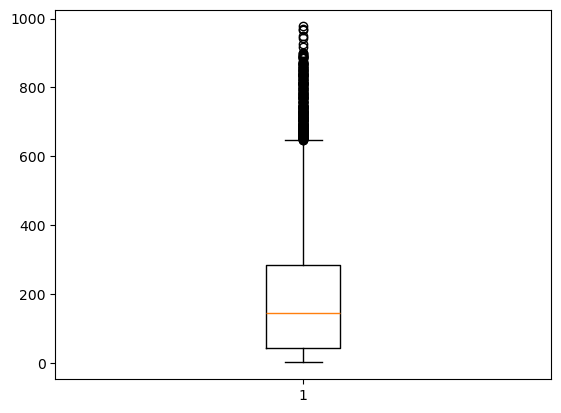

In [30]:
plt.boxplot(bikes_data["count"])
plt.show()

<b>Solutions for skewed data</b>

In [31]:
pd.qcut(bikes_data["count"], q = 10) # decile; it is based on the percentage of data falling in a bin, so the bins have different length of the interval.

0           (9.0, 28.0]
1          (28.0, 61.0]
2          (28.0, 61.0]
3           (9.0, 28.0]
4          (0.999, 9.0]
              ...      
10881    (328.0, 452.0]
10882    (192.0, 249.0]
10883    (145.0, 192.0]
10884    (102.0, 145.0]
10885     (61.0, 102.0]
Name: count, Length: 10886, dtype: category
Categories (10, interval[float64, right]): [(0.999, 9.0] < (9.0, 28.0] < (28.0, 61.0] < (61.0, 102.0] ... (192.0, 249.0] < (249.0, 328.0] < (328.0, 452.0] < (452.0, 977.0]]

In [32]:
pd.qcut(bikes_data["count"], q = 10).value_counts().sort_index()

count
(0.999, 9.0]      1134
(9.0, 28.0]       1096
(28.0, 61.0]      1044
(61.0, 102.0]     1106
(102.0, 145.0]    1072
(145.0, 192.0]    1096
(192.0, 249.0]    1076
(249.0, 328.0]    1100
(328.0, 452.0]    1074
(452.0, 977.0]    1088
Name: count, dtype: int64

In [33]:
pd.qcut(bikes_data["count"], q = 28).value_counts().sort_index()

count
(0.999, 4.0]       530
(4.0, 6.0]         304
(6.0, 10.0]        395
(10.0, 15.0]       359
(15.0, 22.0]       362
(22.0, 31.0]       400
(31.0, 42.0]       375
(42.0, 55.0]       398
(55.0, 69.0]       380
(69.0, 84.0]       403
(84.0, 98.0]       378
(98.0, 114.0]      406
(114.0, 128.0]     366
(128.0, 145.0]     396
(145.0, 162.0]     398
(162.0, 178.0]     383
(178.0, 196.0]     388
(196.0, 215.0]     391
(215.0, 234.0]     381
(234.0, 260.0]     400
(260.0, 284.0]     381
(284.0, 313.0]     383
(313.0, 349.0]     396
(349.0, 387.0]     383
(387.0, 440.0]     384
(440.0, 504.0]     389
(504.0, 611.25]    388
(611.25, 977.0]    389
Name: count, dtype: int64

In [34]:
pd.qcut(bikes_data["registered"], q = 10).value_counts().sort_index()

registered
(-0.001, 7.0]     1143
(7.0, 23.0]       1061
(23.0, 52.0]      1082
(52.0, 86.0]      1104
(86.0, 118.0]     1060
(118.0, 155.0]    1095
(155.0, 197.0]    1089
(197.0, 253.0]    1092
(253.0, 354.0]    1075
(354.0, 886.0]    1085
Name: count, dtype: int64

<b> setting datatime as index</b>

In [35]:
bikes_data_dt = bikes_data.set_index("datetime", drop = True)

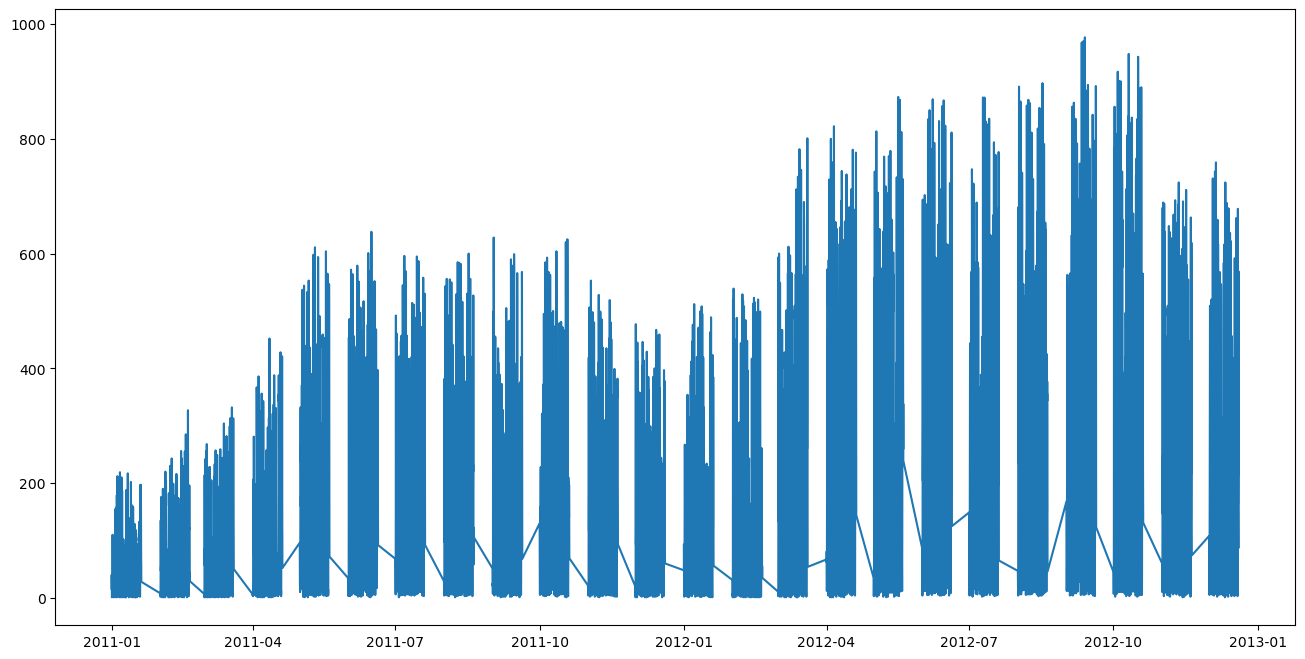

In [36]:
plt.figure(figsize = (16, 8))
plt.plot(bikes_data_dt["count"])

(15400.0, 15431.0)

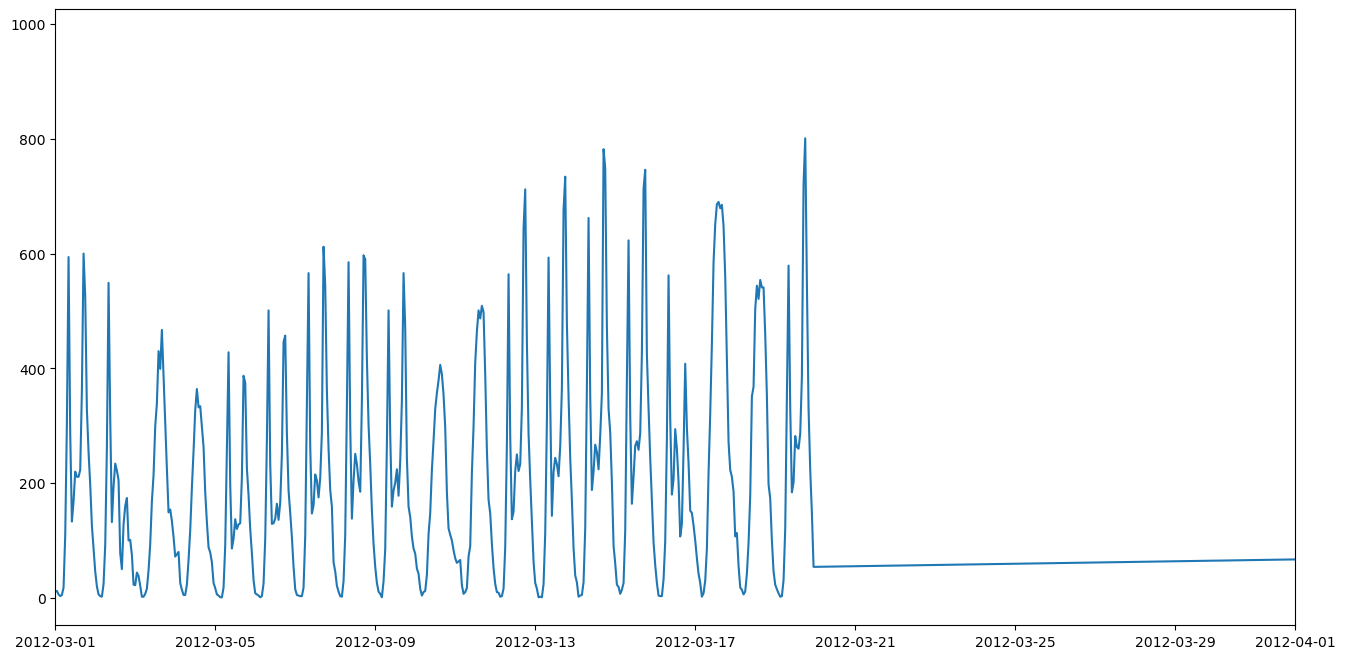

In [37]:
plt.figure(figsize = (16, 8))
plt.plot(bikes_data_dt["count"])
plt.xlim(pd.to_datetime("2012-03-01"), pd.to_datetime("2012-04-01"))

<b> Resampling</b>

In [40]:
bikes_data_dt.resample("12h")

In [45]:
bikes_data_dt.resample("12h").min() # in this case min() gives the first record

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1.0,0.0,0.0,1.0,8.20,12.880,75.0,0.0000,0.0,0.0,1.0
2011-01-01 12:00:00,1.0,0.0,0.0,1.0,16.40,20.455,72.0,12.9980,3.0,17.0,28.0
2011-01-02 00:00:00,1.0,0.0,0.0,2.0,14.76,16.665,71.0,12.9980,0.0,1.0,1.0
2011-01-02 12:00:00,1.0,0.0,0.0,1.0,9.02,10.605,39.0,8.9981,0.0,8.0,8.0
2011-01-03 00:00:00,1.0,0.0,1.0,1.0,5.74,5.305,40.0,12.9980,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-17 12:00:00,4.0,0.0,1.0,2.0,16.40,20.455,87.0,0.0000,5.0,41.0,47.0
2012-12-18 00:00:00,4.0,0.0,1.0,1.0,14.76,17.425,63.0,0.0000,0.0,5.0,5.0
2012-12-18 12:00:00,4.0,0.0,1.0,1.0,13.94,16.665,41.0,0.0000,1.0,80.0,81.0


In [42]:
bikes_data_dt.resample("12h").sum()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,12,0,0,13,127.92,178.030,940,42.0023,69,153,222
2011-01-01 12:00:00,12,0,0,25,210.74,258.320,994,215.9946,262,501,763
2011-01-02 00:00:00,11,0,0,24,186.96,227.260,922,176.9939,34,172,206
2011-01-02 12:00:00,12,0,0,21,155.80,179.540,679,206.0049,97,498,595
2011-01-03 00:00:00,10,0,10,10,69.70,74.255,458,220.0079,30,412,442
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-17 12:00:00,48,0,12,26,201.72,249.990,1095,113.9938,142,2757,2899
2012-12-18 00:00:00,48,0,12,15,203.36,248.480,1040,110.0073,119,1884,2003
2012-12-18 12:00:00,48,0,12,14,200.90,243.170,559,246.0106,314,3240,3554


In [43]:
bikes_data_dt.resample("12h").mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1.0,0.0,0.0,1.083333,10.660000,14.835833,78.333333,3.500192,5.750000,12.750000,18.500000
2011-01-01 12:00:00,1.0,0.0,0.0,2.083333,17.561667,21.526667,82.833333,17.999550,21.833333,41.750000,63.583333
2011-01-02 00:00:00,1.0,0.0,0.0,2.181818,16.996364,20.660000,83.818182,16.090355,3.090909,15.636364,18.727273
2011-01-02 12:00:00,1.0,0.0,0.0,1.750000,12.983333,14.961667,56.583333,17.167075,8.083333,41.500000,49.583333
2011-01-03 00:00:00,1.0,0.0,1.0,1.000000,6.970000,7.425500,45.800000,22.000790,3.000000,41.200000,44.200000
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-17 12:00:00,4.0,0.0,1.0,2.166667,16.810000,20.832500,91.250000,9.499483,11.833333,229.750000,241.583333
2012-12-18 00:00:00,4.0,0.0,1.0,1.250000,16.946667,20.706667,86.666667,9.167275,9.916667,157.000000,166.916667
2012-12-18 12:00:00,4.0,0.0,1.0,1.166667,16.741667,20.264167,46.583333,20.500883,26.166667,270.000000,296.166667


In [44]:
bikes_data_dt.resample("6h").mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1.0,0.0,0.0,1.166667,9.566667,13.889167,77.666667,1.000533,3.166667,14.000000,17.166667
2011-01-01 06:00:00,1.0,0.0,0.0,1.000000,11.753333,15.782500,79.000000,5.999850,8.333333,11.500000,19.833333
2011-01-01 12:00:00,1.0,0.0,0.0,1.833333,18.040000,21.968333,77.000000,19.500350,34.500000,57.833333,92.333333
2011-01-01 18:00:00,1.0,0.0,0.0,2.333333,17.083333,21.085000,88.666667,16.498750,9.166667,25.666667,34.833333
2011-01-02 00:00:00,1.0,0.0,0.0,2.000000,18.368000,22.271000,94.000000,16.398920,2.000000,8.400000,10.400000
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-18 18:00:00,4.0,0.0,1.0,1.000000,14.760000,17.928333,48.333333,14.334650,8.500000,246.000000,254.500000
2012-12-19 00:00:00,4.0,0.0,1.0,1.000000,11.206667,14.520000,69.333333,6.000967,1.833333,15.166667,17.000000
2012-12-19 06:00:00,4.0,0.0,1.0,1.000000,11.890000,15.151667,72.666667,8.501183,12.500000,293.166667,305.666667


In [46]:
bikes_data_dt.resample("3h").mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1.0,0.0,0.0,1.000000,9.293333,13.888333,80.333333,0.000000,5.333333,24.000000,29.333333
2011-01-01 03:00:00,1.0,0.0,0.0,1.333333,9.840000,13.890000,75.000000,2.001067,1.000000,4.000000,5.000000
2011-01-01 06:00:00,1.0,0.0,0.0,1.000000,9.020000,13.636667,80.333333,0.000000,1.333333,3.000000,4.333333
2011-01-01 09:00:00,1.0,0.0,0.0,1.000000,14.486667,17.928333,77.666667,11.999700,15.333333,20.000000,35.333333
2011-01-01 12:00:00,1.0,0.0,0.0,1.666667,18.313333,22.220000,73.666667,19.333967,37.000000,57.666667,94.666667
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 09:00:00,4.0,0.0,1.0,1.000000,13.666667,17.171667,66.333333,9.668100,18.666667,208.333333,227.000000
2012-12-19 12:00:00,4.0,0.0,1.0,1.000000,16.946667,20.958333,51.333333,14.999067,32.000000,190.333333,222.333333
2012-12-19 15:00:00,4.0,0.0,1.0,1.000000,16.946667,20.958333,50.000000,23.001100,30.333333,347.333333,377.666667


In [47]:
bikes_data.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [51]:
bikes_data.head(20).diff() # provides the difference of each record to the previous one

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0 days 01:00:00,0.0,0.0,0.0,0.0,-0.82,-0.760,-1.0,0.0000,5.0,19.0,24.0
2,0 days 01:00:00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0000,-3.0,-5.0,-8.0
3,0 days 01:00:00,0.0,0.0,0.0,0.0,0.82,0.760,-5.0,0.0000,-2.0,-17.0,-19.0
4,0 days 01:00:00,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0000,-3.0,-9.0,-12.0
5,0 days 01:00:00,0.0,0.0,0.0,1.0,0.00,-1.515,0.0,6.0032,0.0,0.0,0.0
6,0 days 01:00:00,0.0,0.0,0.0,-1.0,-0.82,0.755,5.0,-6.0032,2.0,-1.0,1.0
7,0 days 01:00:00,0.0,0.0,0.0,0.0,-0.82,-0.755,6.0,0.0000,-1.0,2.0,1.0
8,0 days 01:00:00,0.0,0.0,0.0,0.0,1.64,1.515,-11.0,0.0000,0.0,5.0,5.0
9,0 days 01:00:00,0.0,0.0,0.0,0.0,3.28,3.030,1.0,0.0000,7.0,-1.0,6.0


In [53]:
bikes_data.head(20).diff(6) # provides the difference of the sixth record to the first one

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0 days 06:00:00,0.0,0.0,0.0,0.0,-0.82,-0.760,-1.0,0.0000,-1.0,-13.0,-14.0
7,0 days 06:00:00,0.0,0.0,0.0,0.0,-0.82,-0.755,6.0,0.0000,-7.0,-30.0,-37.0
8,0 days 06:00:00,0.0,0.0,0.0,0.0,0.82,0.760,-5.0,0.0000,-4.0,-20.0,-24.0
9,0 days 06:00:00,0.0,0.0,0.0,0.0,3.28,3.030,1.0,0.0000,5.0,-4.0,1.0


In [55]:
bikes_data.head(10).shift() # the first record is shifted one place downwards

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,3.0,13.0,16.0
2,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,8.0,32.0,40.0
3,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,5.0,27.0,32.0
4,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,3.0,10.0,13.0
5,2011-01-01 04:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,0.0,1.0,1.0
6,2011-01-01 05:00:00,1.0,0.0,0.0,2.0,9.84,12.880,75.0,6.0032,0.0,1.0,1.0
7,2011-01-01 06:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,2.0,0.0,2.0
8,2011-01-01 07:00:00,1.0,0.0,0.0,1.0,8.20,12.880,86.0,0.0000,1.0,2.0,3.0
9,2011-01-01 08:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,1.0,7.0,8.0


In [57]:
bikes_data.head(10).shift(6) # the first record is shifted to the 6th place

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-01-01 00:00:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16.0
7,2011-01-01 01:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40.0
8,2011-01-01 02:00:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32.0
9,2011-01-01 03:00:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13.0


<b>Merging the new dataset to the old one</b>

In [60]:
bikes_data.merge(bikes_data.shift(6), left_index = True, right_index = True).dropna()

,datetime_x,season_x,holiday_x,workingday_x,weather_x,temp_x,atemp_x,humidity_x,windspeed_x,casual_x,...,holiday_y,workingday_y,weather_y,temp_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,count_y
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,...,0.0,0.0,1.0,9.84,14.395,81.0,0.0000,3.0,13.0,16.0
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,...,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,8.0,32.0,40.0
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,...,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,5.0,27.0,32.0
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,...,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,3.0,10.0,13.0
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,...,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,0.0,1.0,1.0,17.22,21.210,50.0,12.9980,30.0,183.0,213.0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,0.0,1.0,1.0,17.22,21.210,50.0,12.9980,33.0,185.0,218.0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,0.0,1.0,1.0,17.22,21.210,50.0,19.0012,28.0,209.0,237.0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,0.0,1.0,1.0,17.22,21.210,50.0,23.9994,37.0,297.0,334.0


In [61]:
bikes_data_dt.rolling(10).mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4.0,0.0,1.0,1.0,16.236,20.2260,52.8,18.60054,26.5,280.4,306.9
2012-12-19 20:00:00,4.0,0.0,1.0,1.0,16.400,20.3020,51.5,19.40052,25.8,288.8,314.6
2012-12-19 21:00:00,4.0,0.0,1.0,1.0,16.154,19.8475,52.2,19.40052,23.1,288.3,311.4


In time series analysis, rolling() is a method used to compute a moving statistic (like mean, sum, or standard deviation) over a specified window of consecutive data points, allowing for smooth trend analysis.

In [66]:
bikes_data = bikes_data.rename(columns = {"count": "num_rentals"})

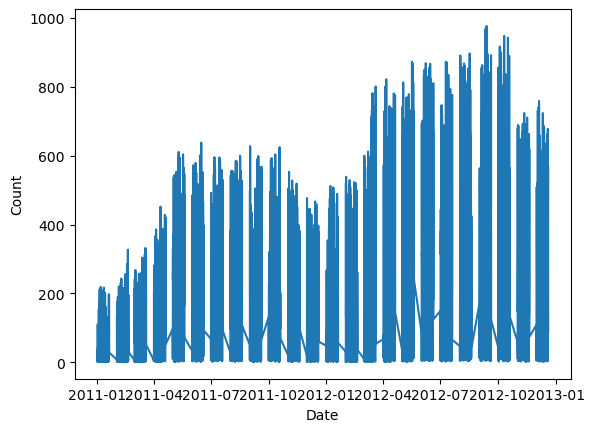

In [68]:
plt.plot(bikes_data.datetime, bikes_data["num_rentals"])
plt.xlabel("Date")  
plt.ylabel("Count")    
plt.show()

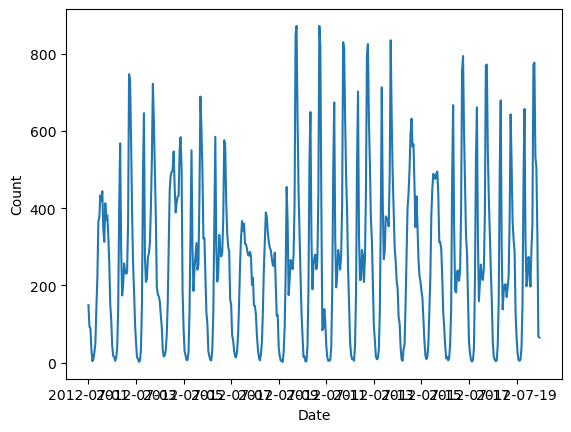

In [70]:
bikes_data_july = bikes_data[
    (bikes_data.datetime >= "2012-07-01") &
    (bikes_data.datetime < "2012-08-01") 
]


plt.plot(bikes_data_july.datetime, bikes_data_july["num_rentals"])
plt.xlabel("Date")  
plt.ylabel("Count")    
plt.show()

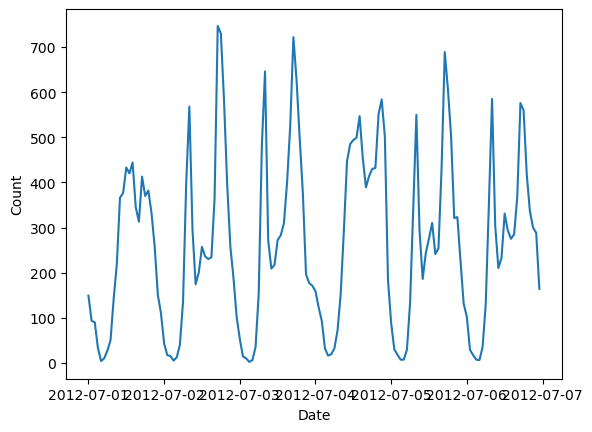

In [71]:
bikes_data_july_week = bikes_data[
    (bikes_data.datetime >= "2012-07-01") &
    (bikes_data.datetime < "2012-07-07") 
]


plt.plot(bikes_data_july_week.datetime, bikes_data_july_week["num_rentals"])
plt.xlabel("Date")  
plt.ylabel("Count")    
plt.show()

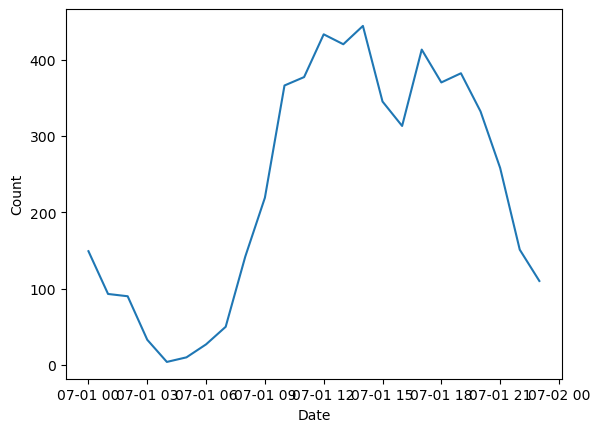

In [73]:
bikes_data_july_day_1 = bikes_data[
    (bikes_data.datetime >= "2012-07-01") &
    (bikes_data.datetime < "2012-07-02") 
]


plt.plot(bikes_data_july_day_1.datetime, bikes_data_july_day_1["num_rentals"])
plt.xlabel("Date")  
plt.ylabel("Count")    
plt.show()

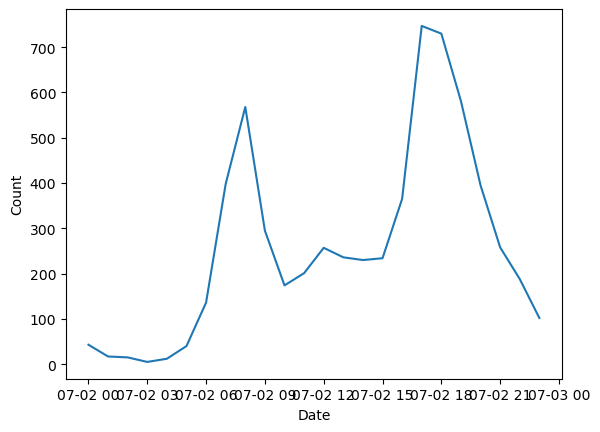

In [74]:
bikes_data_july_day_2 = bikes_data[
    (bikes_data.datetime >= "2012-07-02") &
    (bikes_data.datetime < "2012-07-03") 
]


plt.plot(bikes_data_july_day_2.datetime, bikes_data_july_day_2["num_rentals"])
plt.xlabel("Date")  
plt.ylabel("Count")    
plt.show()

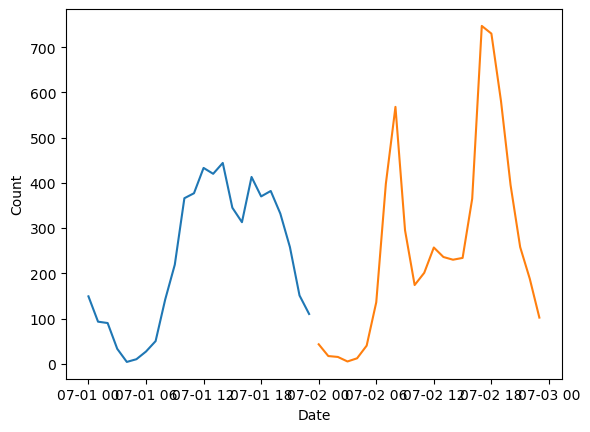

In [75]:
plt.plot(bikes_data_july_day_1.datetime, bikes_data_july_day_1["num_rentals"])
plt.plot(bikes_data_july_day_2.datetime, bikes_data_july_day_2["num_rentals"])
plt.xlabel("Date")  
plt.ylabel("Count")    
plt.show()

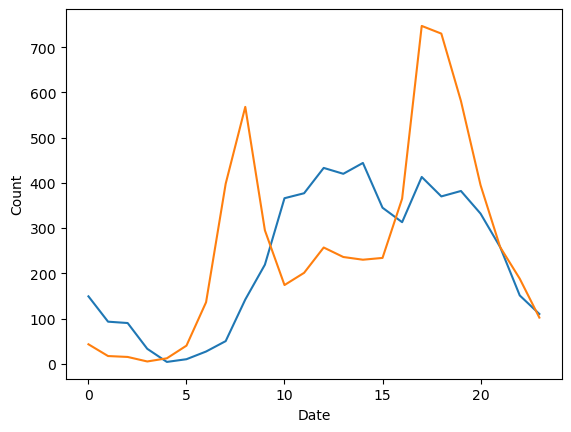

In [77]:
plt.plot(bikes_data_july_day_1["num_rentals"].reset_index(drop = True))
plt.plot(bikes_data_july_day_2["num_rentals"].reset_index(drop = True))
plt.xlabel("Date")  
plt.ylabel("Count")    
plt.show()

In [78]:
# Nyquist-Shannon sampling theorem

In [82]:
STL(bikes_data.num_rentals, period = 24).config

{'period': 24,
 'seasonal': 7,
 'seasonal_deg': 1,
 'seasonal_jump': 1,
 'trend': 47,
 'trend_deg': 1,
 'trend_jump': 1,
 'low_pass': 25,
 'low_pass_deg': 1,
 'low_pass_jump': 1,
 'robust': False}

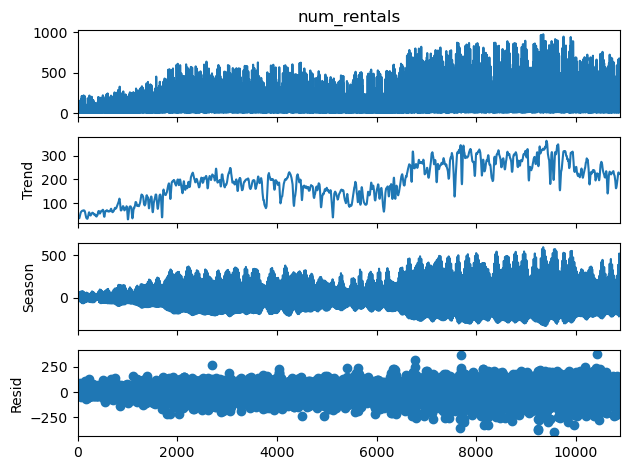

In [92]:
stl = STL(bikes_data.num_rentals, period = 24)
res = stl.fit()
fig = res.plot()

In [94]:
seasonal_decompose(bikes_data.num_rentals, period = 24)

In [95]:
dir(seasonal_decompose(bikes_data.num_rentals, period = 24))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

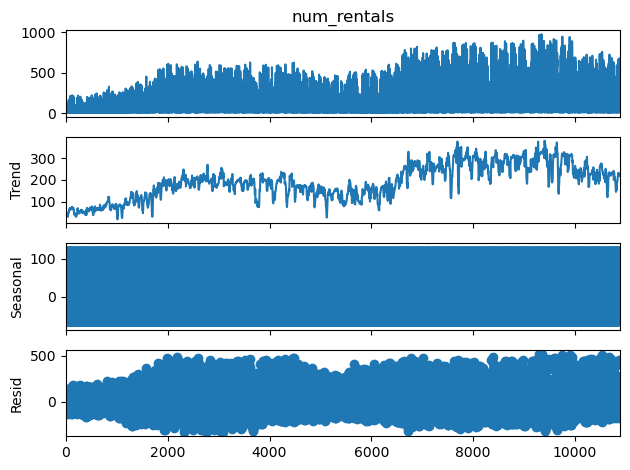

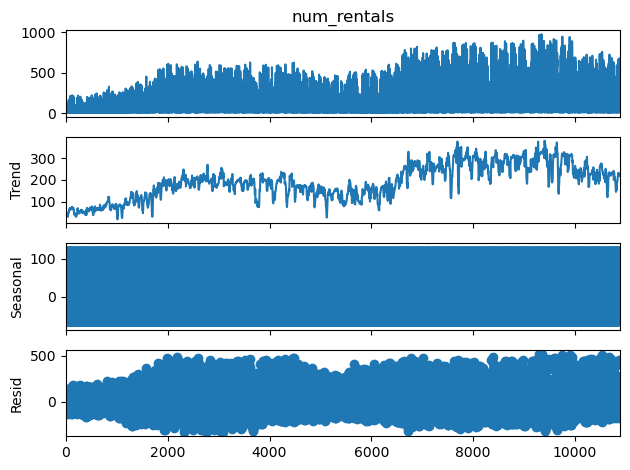

In [96]:
seasonal_decompose(bikes_data.num_rentals, period = 24).plot()

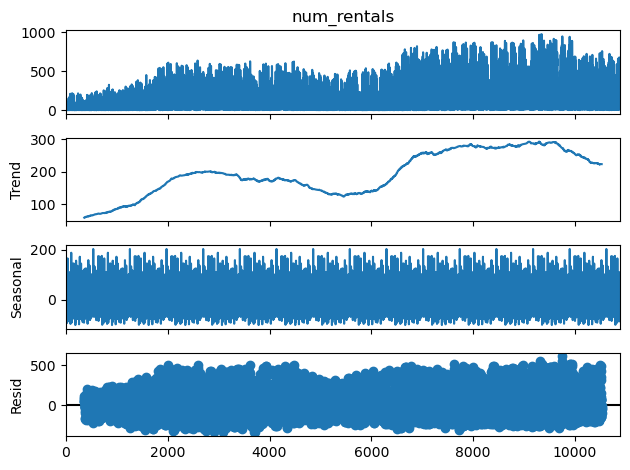

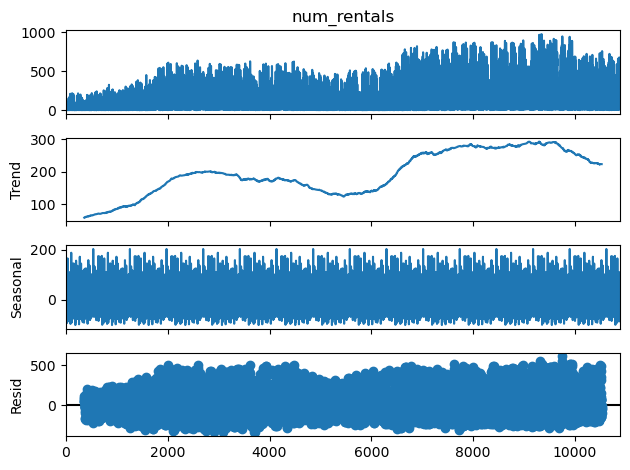

In [98]:
seasonal_decompose(bikes_data.num_rentals, period = 24 * 30).plot()